# Data Sufficiency and Selection

In this notebook we will be covering the following

- Feature Importance
- Single Factor Analysis
- Learning Curves

In [4]:
# all imports at the top!
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from IPython.display import Image

% matplotlib inline

In [5]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Single Factor Analysis on Categoricals



## nunique

count how many unique values exist for a categorical

In [6]:
df.Ticket.nunique()

681

In [7]:
df.PassengerId.nunique()

891

## value_counts

count the occurrences of each category for a features

In [8]:
df.Ticket.value_counts().head()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
Name: Ticket, dtype: int64

In [9]:
df.Cabin.value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
Name: Cabin, dtype: int64

## plot the value counts for all categoricals

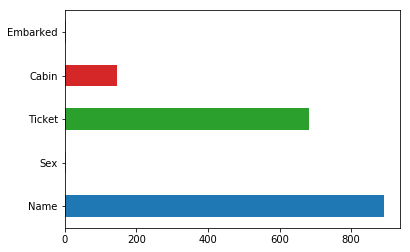

In [10]:
categorical_columns = df.select_dtypes(include='object').columns
pd.Series({
    colname: df[colname].nunique()
    for colname in categorical_columns
}, index=categorical_columns).plot.barh();

# Learning curve

Here is the function that is taken from the sklearn page on learning curves:

In [11]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test Set score")

    plt.legend(loc="best")
    return plt

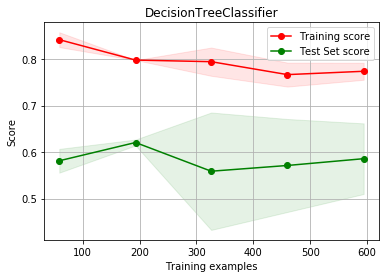

In [18]:
# and this is how we used it


X = df.select_dtypes(exclude='object').fillna(-1).drop('Survived', axis=1)
y = df.Survived

clf = DecisionTreeClassifier(random_state=1, max_depth=5)

plot_learning_curve(X=X, y=y, estimator=clf, title='DecisionTreeClassifier');

And remember the internals of what this function is actually doing by knowing how to use the
output of the scikit [learning_curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) function

In [19]:
# here's where the magic happens! The learning curve function is going
# to take your classifier and your training data and subset the data
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)

# 5 different training set sizes have been selected
# with the smallest being 59 and the largest being 594
# the remaining is used for testing
print('train set sizes', train_sizes)
print('test set sizes', X.shape[0] - train_sizes)

train set sizes [ 59 193 326 460 594]
test set sizes [832 698 565 431 297]


In [20]:
# each row corresponds to a training set size
# each column corresponds to a cross validation fold
# the first row is the highest because it corresponds
# the smallest training set which means that it's very
# easy for the classifier to overfit and have perfect
# test set predictions while as the test set grows it
# bcomes a bit mor difficult for this to happen.
train_scores

array([[0.86440678, 0.83050847, 0.83050847],
       [0.79792746, 0.79792746, 0.79792746],
       [0.83435583, 0.78834356, 0.7607362 ],
       [0.79782609, 0.7673913 , 0.73478261],
       [0.79292929, 0.77946128, 0.74915825]])

In [21]:
# The test set scores where again, each row corresponds
# to a train / test set size and each column is a differet
# run with the same train / test sizes
test_scores

array([[0.61616162, 0.57239057, 0.55555556],
       [0.62962963, 0.61616162, 0.61616162],
       [0.61616162, 0.38383838, 0.67676768],
       [0.62626263, 0.43097643, 0.65656566],
       [0.5959596 , 0.48821549, 0.67340067]])

In [22]:
# Let's average the scores across each fold so that we can plot them
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

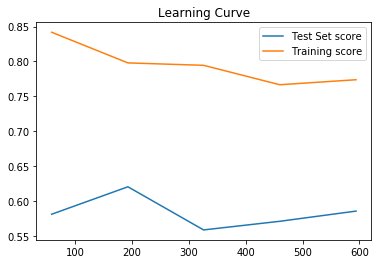

In [25]:
# this one isn't quite as cool as the other because it doesn't show the variance
# but the fundamentals are still here and it's a much simpler one to understand

learning_curve_df = pd.DataFrame({
    'Training score': train_scores_mean,
    'Test Set score': test_scores_mean
}, index=train_sizes)

learning_curve_df.plot.line(title='Learning Curve');

# Feature importance

Using any tree-based estimator, you can get feature importances on a model that has already been fitted

In [31]:
# model must be fitted
clf.fit(X, y)
feature_importances = clf.feature_importances_

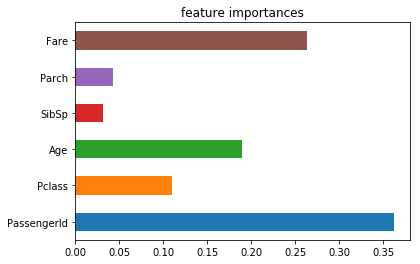

In [34]:
# now you can plot the importances by creating a pandas Series with the correct index

pd.Series(clf.feature_importances_, index=X.columns).plot.barh(title='feature importances');